<a href="https://colab.research.google.com/github/Abhirup193/Automated-Face-Mask-Detection-Using-CNNs/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle


In [6]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:06<00:00, 31.7MB/s]
100% 163M/163M [00:06<00:00, 26.2MB/s]


In [8]:
# extracting the comressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [9]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2089.jpg', 'with_mask_919.jpg', 'with_mask_2759.jpg', 'with_mask_2841.jpg', 'with_mask_371.jpg']
['with_mask_553.jpg', 'with_mask_3595.jpg', 'with_mask_1069.jpg', 'with_mask_1207.jpg', 'with_mask_639.jpg']


In [12]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3509.jpg', 'without_mask_3530.jpg', 'without_mask_3754.jpg', 'without_mask_593.jpg', 'without_mask_2040.jpg']
['without_mask_46.jpg', 'without_mask_1140.jpg', 'without_mask_67.jpg', 'without_mask_557.jpg', 'without_mask_3102.jpg']


In [13]:
print('Number of with_musk images',len(with_mask_files))
print('Number of without_musk images',len(without_mask_files))

Number of with_musk images 3725
Number of without_musk images 3828


In [14]:
# create labels for two class of images
# with_musk-->1
# without_musk-->0
with_musk_labels=[1]*3725
without_musk_labels=[0]*3828

In [15]:
print(with_musk_labels[0:5])
print(without_musk_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_musk_labels))
print(len(without_musk_labels))

3725
3828


In [17]:
labels=with_musk_labels+without_musk_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


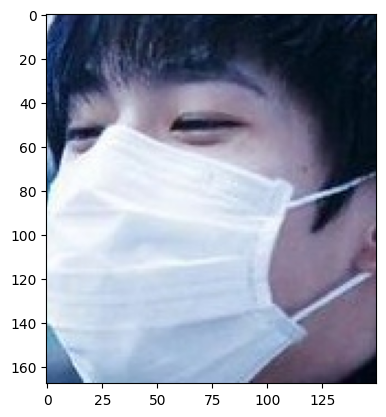

In [18]:
# display with_musk images
img = mpimg.imread('/content/data/with_mask/with_mask_553.jpg')
imgplot = plt.imshow(img)
plt.show()

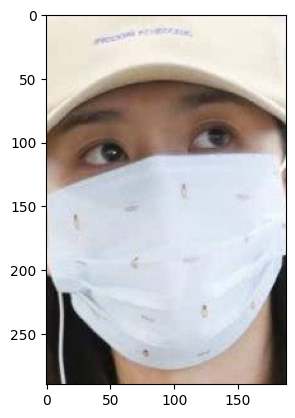

In [19]:
# display with_musk images
img = mpimg.imread('/content/data/with_mask/with_mask_919.jpg')
imgplot = plt.imshow(img)
plt.show()

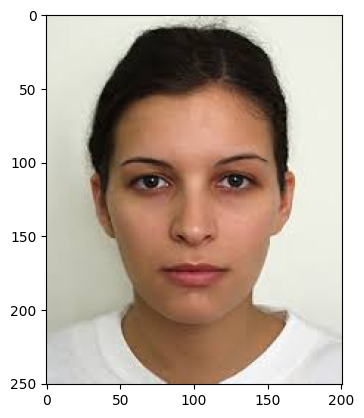

In [20]:
# display without_musk images
img = mpimg.imread('/content/data/without_mask/without_mask_1140.jpg')
imgplot = plt.imshow(img)
plt.show()

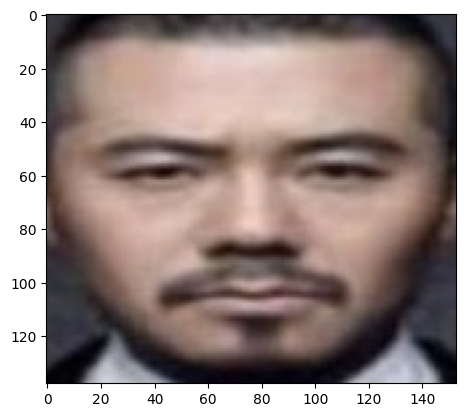

In [21]:
# display without_musk images
img = mpimg.imread('/content/data/without_mask/without_mask_46.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
# Image Processing
# Resize the images
# convert images to numpy array
with_mask_path='/content/data/with_mask'

data=[] # an empty list

for img_file in with_mask_files:
  image=Image.open(with_mask_path+'/'+img_file)
  image=image.resize((128,128))
  # convert all images to RGB image
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+'/'+img_file)
  image=image.resize((128,128))
  # convert all images to RGB image
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


In [26]:
type(data)

list

In [27]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 251, 253],
        [250, 251, 253],
        [250, 251, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 251, 253],
        [250, 251, 253],
        [250, 251, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 246, 247],
        [250, 251, 253],
        [250, 251, 253]]], dtype=uint8)
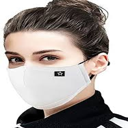

In [28]:
data[0]

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(128, 128, 3)

In [31]:
# convert image list and label list to numpy array

X=np.array(data)
Y=np.array(labels)

In [32]:
type(X)

numpy.ndarray

In [33]:
type(Y)

numpy.ndarray

In [35]:
print(X.shape)

(7553, 128, 128, 3)


In [36]:
Y.shape

(7553,)

In [38]:
print(Y)

[1 1 1 ... 0 0 0]


In [40]:
# do train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [42]:
# scale the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [44]:
print(X_train_scaled.shape,X_test_scaled.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [45]:
print(X_train_scaled[0])

[[[0.0627451  0.05490196 0.06666667]
  [0.0627451  0.05490196 0.06666667]
  [0.05490196 0.05098039 0.05882353]
  ...
  [0.17254902 0.14901961 0.14901961]
  [0.17647059 0.15294118 0.15294118]
  [0.17647059 0.15294118 0.15294118]]

 [[0.05490196 0.04705882 0.05882353]
  [0.05490196 0.04705882 0.05882353]
  [0.05098039 0.04705882 0.05490196]
  ...
  [0.18431373 0.16078431 0.15686275]
  [0.18431373 0.16078431 0.15686275]
  [0.18039216 0.16078431 0.15686275]]

 [[0.04313725 0.03529412 0.04705882]
  [0.04313725 0.03529412 0.04705882]
  [0.05098039 0.04313725 0.05490196]
  ...
  [0.2        0.17254902 0.16470588]
  [0.19215686 0.16862745 0.15686275]
  [0.18823529 0.16862745 0.15686275]]

 ...

 [[0.6627451  0.64705882 0.61176471]
  [0.6627451  0.65098039 0.61568627]
  [0.67058824 0.65490196 0.61960784]
  ...
  [0.28235294 0.29803922 0.33333333]
  [0.30196078 0.31764706 0.35294118]
  [0.30980392 0.3254902  0.36078431]]

 [[0.65882353 0.64313725 0.60784314]
  [0.65882353 0.64705882 0.61176471]


In [46]:
print(X_test_scaled[0])

[[[0.77254902 0.81960784 0.88235294]
  [0.77254902 0.81960784 0.88235294]
  [0.77647059 0.82352941 0.88627451]
  ...
  [0.89803922 0.9254902  0.96470588]
  [0.90196078 0.92941176 0.96862745]
  [0.90196078 0.92941176 0.96862745]]

 [[0.77254902 0.81960784 0.88235294]
  [0.77647059 0.82352941 0.88627451]
  [0.78039216 0.82745098 0.89019608]
  ...
  [0.90196078 0.92941176 0.96862745]
  [0.90196078 0.92941176 0.96862745]
  [0.90196078 0.92941176 0.96862745]]

 [[0.77647059 0.82352941 0.88627451]
  [0.78039216 0.82745098 0.89019608]
  [0.78039216 0.82745098 0.89019608]
  ...
  [0.90196078 0.92941176 0.96862745]
  [0.90588235 0.93333333 0.97254902]
  [0.90196078 0.92941176 0.96862745]]

 ...

 [[0.08627451 0.11764706 0.13333333]
  [0.02745098 0.05490196 0.07058824]
  [0.04313725 0.06666667 0.08235294]
  ...
  [0.17647059 0.23921569 0.27843137]
  [0.21176471 0.27843137 0.31764706]
  [0.57254902 0.62745098 0.67058824]]

 [[0.04313725 0.07058824 0.08235294]
  [0.02352941 0.05098039 0.05882353]


In [47]:
# Build a CNN(Convolutional Neural Network)
import tensorflow as tf
from tensorflow import keras

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


In [52]:
num_of_classes=2
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_of_classes,activation='sigmoid'))

In [53]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
#training the neural network
history=model.fit(X_train_scaled,Y_train,validation_split=0.2,epochs=10)

Epoch 1/10
152/152 [==============================] - 178s 1s/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.3697 - val_accuracy: 0.9280
Epoch 2/10
152/152 [==============================] - 178s 1s/step - loss: 0.0185 - accuracy: 0.9948 - val_loss: 0.4253 - val_accuracy: 0.9313
Epoch 3/10
152/152 [==============================] - 179s 1s/step - loss: 0.0281 - accuracy: 0.9894 - val_loss: 0.4401 - val_accuracy: 0.9289
Epoch 4/10
152/152 [==============================] - 181s 1s/step - loss: 0.0247 - accuracy: 0.9934 - val_loss: 0.4126 - val_accuracy: 0.9264
Epoch 5/10
152/152 [==============================] - 176s 1s/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.3895 - val_accuracy: 0.9338
Epoch 6/10
152/152 [==============================] - 166s 1s/step - loss: 0.0231 - accuracy: 0.9940 - val_loss: 0.3886 - val_accuracy: 0.9280
Epoch 7/10
152/152 [==============================] - 167s 1s/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.4560 - val_accuracy: 0.9371

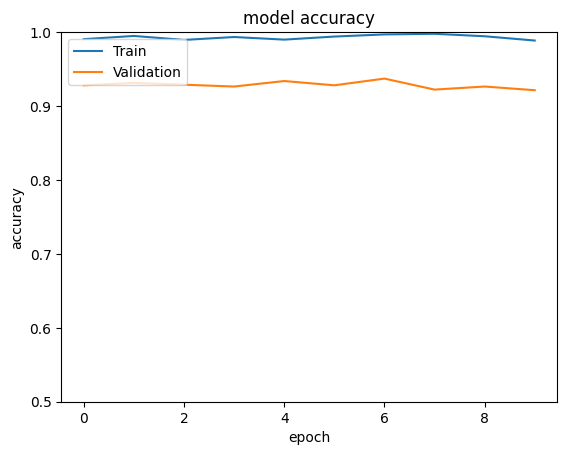

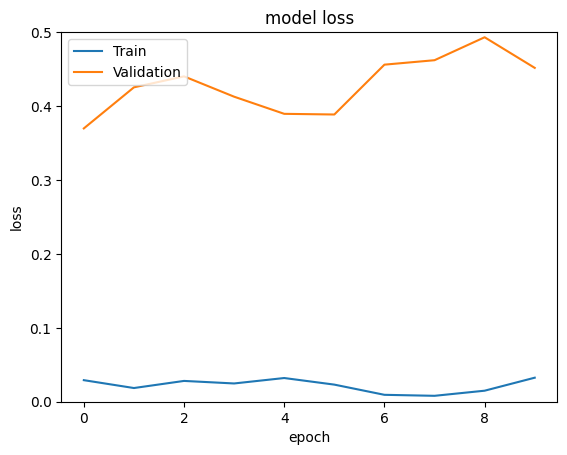

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.5, 1)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, 0.5)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

path of the image to be predicted:/content/mask-image1.jpeg


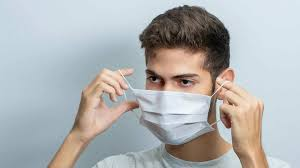

1/1 [==============================] - 0s 168ms/step
[[0.10422724 0.8551949 ]]
1
The person in the image is wearing a mask


In [58]:
input_image_path= input('path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')